In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('FuelConsumption.csv')
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.shape

(1067, 13)

In [4]:
df.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

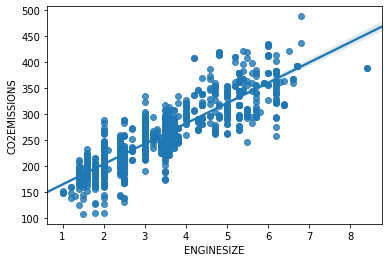

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.regplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = df)
plt.show()

In [7]:
train_x = df['ENGINESIZE'].values
train_y = df['CO2EMISSIONS'].values

train_y[0:10]

array([196, 221, 136, 255, 244, 230, 232, 255, 267, 212], dtype=int64)

In [8]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [9]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)
y = a * train_x + b

In [10]:
loss = tf.reduce_mean(tf.square(y - train_y))
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [11]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

In [12]:
train = optimizer.minimize(loss)

In [13]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
print(sess.run(init))

None


In [14]:
loss_values = []
train_data = []

for epoch in range(100):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_values.append(loss_val)
    if epoch % 5 == 0:
        print('Epoch', epoch, 'Loss', loss_val)
        train_data.append([a_val, b_val])
    

Epoch 0 Loss 26992.594
Epoch 5 Loss 1891.7205
Epoch 10 Loss 1762.7241
Epoch 15 Loss 1653.5897
Epoch 20 Loss 1559.0441
Epoch 25 Loss 1477.1372
Epoch 30 Loss 1406.179
Epoch 35 Loss 1344.7057
Epoch 40 Loss 1291.4506
Epoch 45 Loss 1245.3145
Epoch 50 Loss 1205.3451
Epoch 55 Loss 1170.7189
Epoch 60 Loss 1140.7214
Epoch 65 Loss 1114.734
Epoch 70 Loss 1092.2203
Epoch 75 Loss 1072.7163
Epoch 80 Loss 1055.8193
Epoch 85 Loss 1041.1812
Epoch 90 Loss 1028.4996
Epoch 95 Loss 1017.5135


Text(0, 0.5, 'Loss')

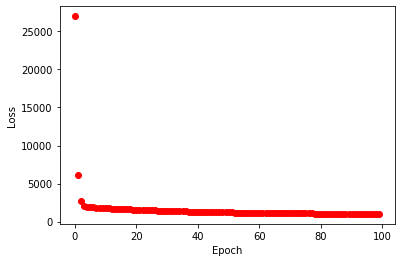

In [15]:
plt.plot(loss_values,'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')